# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [3]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import KAIST
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np

# Instantiating a downloader object

In [4]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['KAIST'])
downloader.download_extract('KAIST.zip', 'KAIST/')

# Instantiating a digestor object

In [5]:
# using only two channels out of four available ones to avoid RAM oveflow
kaist = KAIST('KAIST/', os.listdir('KAIST/'), list(range(2)))
mining_params = {
    'win_len': 20000,
    'hop_len': 20000,
}
kaist.mine(mining_params)

# Aggregating data over the first channel

In [6]:
df = pd.concat(kaist.data[0]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,19993,19994,19995,19996,19997,19998,19999,load,state,severity
0,-9.983773,-5.581663,-9.021765,-7.975264,2.081705,9.430775,11.748174,15.790914,16.676600,7.931154,...,8.206751,1.376906,-9.586422,-8.714918,-3.756685,-5.113159,-3.530606,2,BPFO,30
1,5.733103,10.520906,13.094673,17.159407,16.521794,6.372038,-3.550317,-9.937379,-12.039157,-12.430858,...,1.036646,13.490100,14.490569,13.648873,15.623248,9.314310,1.733152,2,BPFO,30
2,-4.893931,-10.919218,-15.242243,-14.943689,-10.780879,-7.693897,-7.840289,-7.269022,-5.441040,-5.727454,...,3.682047,1.208158,-4.871816,-11.421616,-13.537456,-10.480401,-12.794917,2,BPFO,30
3,-14.394056,-7.913125,-3.316787,-5.073977,-2.598646,0.609969,-1.248182,-6.041513,-0.513215,6.354129,...,-11.126187,-5.475174,-0.965974,2.309707,3.132774,-3.409574,-3.999711,2,BPFO,30
4,-0.557085,1.721013,5.022175,6.735014,7.390655,11.589883,17.344140,15.070971,8.882825,3.655605,...,-2.702251,-2.383505,5.725411,13.404525,13.813053,13.950431,15.250896,2,BPFO,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,-8.983785,26.844986,38.226218,38.991834,37.721416,29.792546,19.585339,-12.807657,-20.559486,-33.920261,...,14.744172,13.782885,9.110827,6.946550,-3.137101,-5.144168,-1.692648,0,BPFI,10
5725,-7.519981,-2.334948,2.991791,-0.255886,2.804293,0.965854,-2.082186,-5.661470,-10.352158,-6.042955,...,3.278806,9.575965,9.550605,9.228373,4.016778,4.005961,-3.269552,0,BPFI,10
5726,-8.047018,-7.215778,-3.796949,-5.032391,0.167786,8.152064,4.972055,0.429081,3.269912,-0.411413,...,-12.449728,-9.508538,-41.506106,-45.837904,-19.439667,-22.609100,-13.569186,0,BPFI,10
5727,0.215142,30.782679,20.712729,34.528907,24.033121,16.579846,-3.532409,-12.659702,-18.068410,-5.160755,...,1.209721,2.034711,-1.862598,-3.351762,-1.685316,-1.657672,0.820783,0,BPFI,10


# Signals-Metadata declaration

In [7]:
signals, metadata = df.iloc[:, : - 3], df.iloc[:, - 3 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,-9.983773,-5.581663,-9.021765,-7.975264,2.081705,9.430775,11.748174,15.790914,16.676600,7.931154,...,14.370018,17.789567,11.345535,8.206751,1.376906,-9.586422,-8.714918,-3.756685,-5.113159,-3.530606
1,5.733103,10.520906,13.094673,17.159407,16.521794,6.372038,-3.550317,-9.937379,-12.039157,-12.430858,...,-5.633465,-0.933763,-4.675184,1.036646,13.490100,14.490569,13.648873,15.623248,9.314310,1.733152
2,-4.893931,-10.919218,-15.242243,-14.943689,-10.780879,-7.693897,-7.840289,-7.269022,-5.441040,-5.727454,...,11.160561,17.818533,12.411628,3.682047,1.208158,-4.871816,-11.421616,-13.537456,-10.480401,-12.794917
3,-14.394056,-7.913125,-3.316787,-5.073977,-2.598646,0.609969,-1.248182,-6.041513,-0.513215,6.354129,...,-18.478501,-18.214562,-16.636577,-11.126187,-5.475174,-0.965974,2.309707,3.132774,-3.409574,-3.999711
4,-0.557085,1.721013,5.022175,6.735014,7.390655,11.589883,17.344140,15.070971,8.882825,3.655605,...,-2.655497,-5.019530,-3.375680,-2.702251,-2.383505,5.725411,13.404525,13.813053,13.950431,15.250896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,-8.983785,26.844986,38.226218,38.991834,37.721416,29.792546,19.585339,-12.807657,-20.559486,-33.920261,...,-4.496219,6.369394,12.059469,14.744172,13.782885,9.110827,6.946550,-3.137101,-5.144168,-1.692648
5725,-7.519981,-2.334948,2.991791,-0.255886,2.804293,0.965854,-2.082186,-5.661470,-10.352158,-6.042955,...,-8.123098,-6.396076,-0.563455,3.278806,9.575965,9.550605,9.228373,4.016778,4.005961,-3.269552
5726,-8.047018,-7.215778,-3.796949,-5.032391,0.167786,8.152064,4.972055,0.429081,3.269912,-0.411413,...,26.727560,37.322984,-15.210512,-12.449728,-9.508538,-41.506106,-45.837904,-19.439667,-22.609100,-13.569186
5727,0.215142,30.782679,20.712729,34.528907,24.033121,16.579846,-3.532409,-12.659702,-18.068410,-5.160755,...,-2.164998,-0.106008,0.393505,1.209721,2.034711,-1.862598,-3.351762,-1.685316,-1.657672,0.820783


In [8]:
metadata

,load,state,severity
0,2,BPFO,30
1,2,BPFO,30
2,2,BPFO,30
3,2,BPFO,30
4,2,BPFO,30
...,...,...,...
5724,0,BPFI,10
5725,0,BPFI,10
5726,0,BPFI,10
5727,0,BPFI,10


# Signal Processing

## Envelope Extraction

In [9]:
signals_env = env(signals)
signals_env.shape

(5729, 20000)

## FFT

In [10]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 12500], 'bandpass', fs = 25600, output='sos')

In [11]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(5729, 10000)

## ZoomedFFT

In [12]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 2500, 2500, 25600, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(5729, 2500)

## STFT

In [13]:
STFT_window = scipy.signal.windows.hann(4000)
STFT_freq_filter = scipy.signal.butter(25, [5, 12500], 'bandpass', fs = 25600, output='sos')
signals_env_STFT = stft(signals_env, 4000, 2000, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(5729, 8, 2000)

## Statistical Features

In [14]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,-0.003365,86.525441,9.301906
1,-0.004843,87.090277,9.332218
2,-0.008090,87.625516,9.360854
3,0.002506,87.607116,9.359868
4,0.002522,88.252907,9.394302
...,...,...,...
5724,0.000803,181.396664,13.468358
5725,-0.007389,178.195159,13.348978
5726,-0.007735,178.874203,13.374388
5727,0.008702,176.674543,13.291900


# Visualization

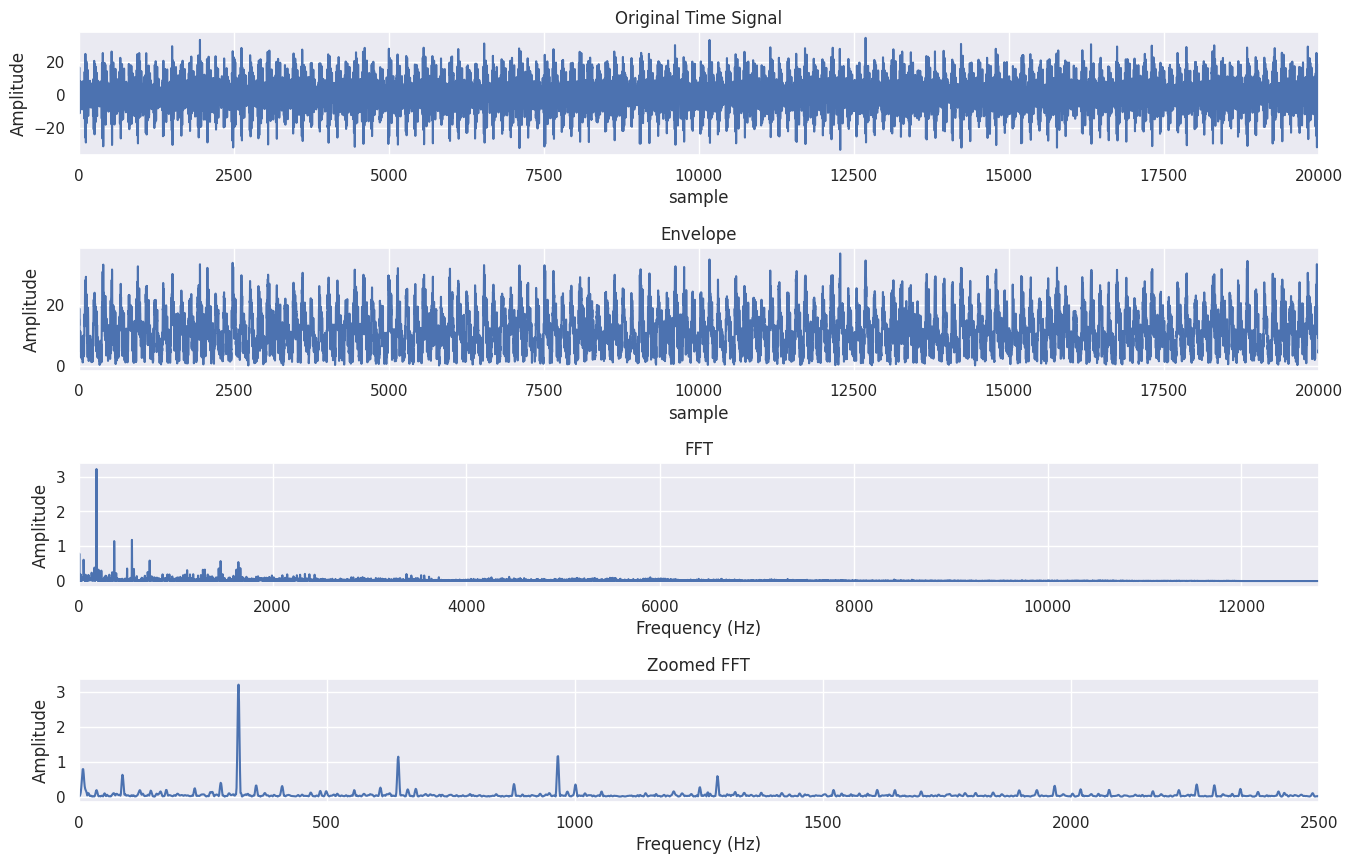

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 20000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 20000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(20000, 25600), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 12800)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 2500, 2500), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 2500)


plt.subplots_adjust(hspace = 0.75)
fig.show()

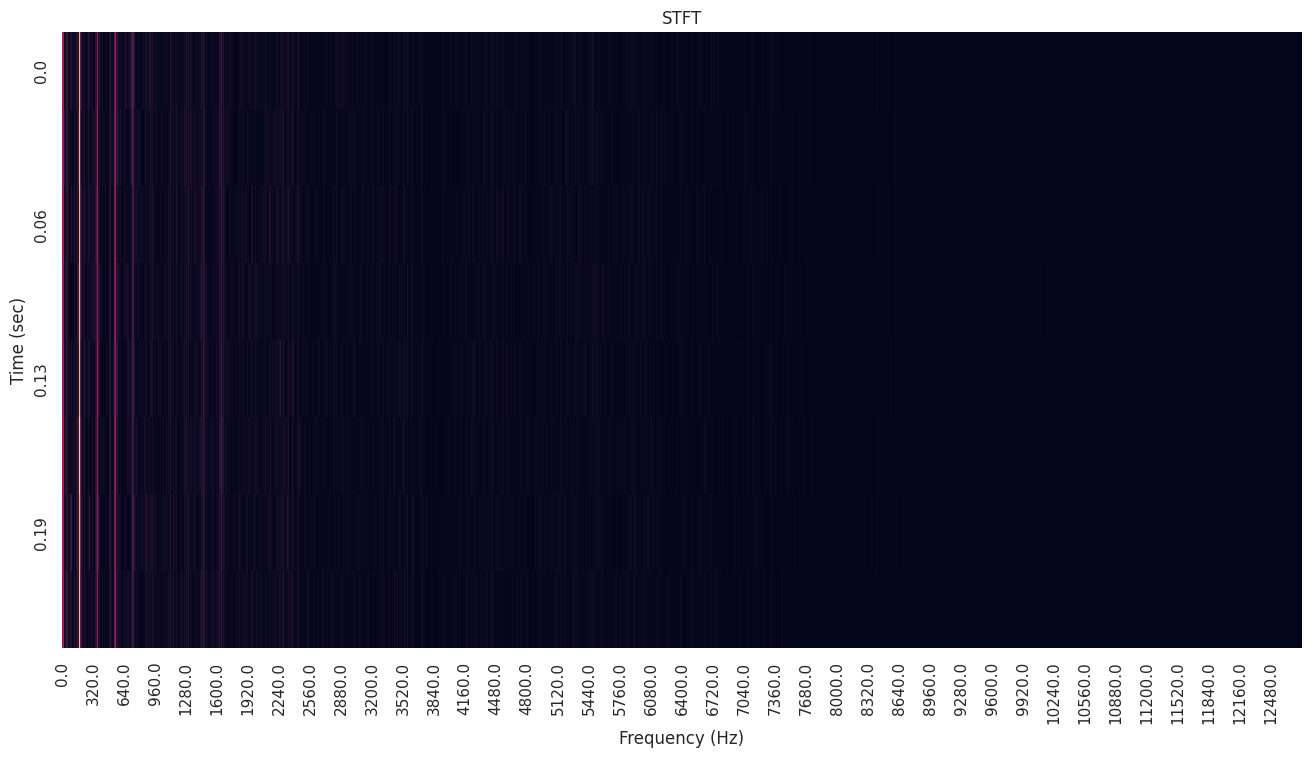

In [20]:
import plotly.express as px

t = np.linspace(0, 0.222, 8)
f = fft_freq_axis(4000, 25600)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::50])
ax.set_yticks(ax.get_yticks()[::2])


fig.show()